#Training Model

In [1]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
paths = []
labels = []
datadir = '/content/drive/MyDrive/Deep Learning/audio_data'

In [3]:
for dirname, _, filenames in os.walk(datadir):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())

In [4]:
# creating dataframe
df = pd.DataFrame()
df['speech'] = paths
df['labels'] = labels
df.head()

,speech,labels
0,/content/drive/MyDrive/Deep Learning/audio_dat...,angry
1,/content/drive/MyDrive/Deep Learning/audio_dat...,angry
2,/content/drive/MyDrive/Deep Learning/audio_dat...,angry
3,/content/drive/MyDrive/Deep Learning/audio_dat...,angry
4,/content/drive/MyDrive/Deep Learning/audio_dat...,angry


In [5]:
df['labels'].value_counts()

angry      400
happy      400
disgust    400
sad        400
fear       400
neutral    400
ps         400
Name: labels, dtype: int64

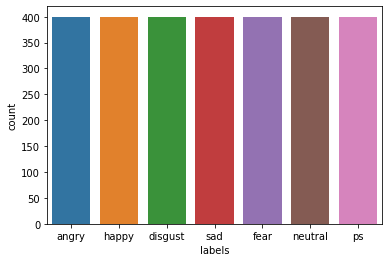

In [6]:
sns.countplot(df['labels'])

#Feature Extraction

In [7]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration = 3, offset = 0.5)
  mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
  return mfcc

In [8]:
extract_mfcc(df['speech'][0])

array([-3.2428583e+02,  8.9390839e+01, -2.1394699e+01,  1.1373578e+01,
       -1.6778145e+01, -1.5559760e+00,  7.5961738e+00, -3.1605333e+01,
       -7.0607700e+00,  4.1174576e-01, -1.6250969e+01,  1.1427384e+01,
       -1.8227743e+01,  8.3026066e+00, -2.2283702e+00, -1.0665507e+01,
       -2.7827377e+00, -5.5310738e-01, -1.2593068e+01, -6.7727523e+00,
       -4.1874127e+00, -3.9384236e+00, -1.1161440e+01,  3.4138471e-01,
       -2.9274983e+00, -4.1621599e+00,  4.3973150e+00,  4.0284281e+00,
        7.0542245e+00,  1.9489025e+01,  1.6470110e+01,  1.8149494e+01,
        8.5920467e+00,  3.7549043e+00, -1.4328033e+00,  1.8186370e+00,
        1.0408536e+00,  5.0362511e+00, -1.4934543e+00, -2.7782950e-01],
      dtype=float32)

In [9]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [10]:
X = [x for x in X_mfcc]
X = np.array(X)
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
enc = OneHotEncoder()
y = enc.fit_transform(df[['labels']])
y = y.toarray()
y.shape

(2800, 7)

# CNN Model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [14]:
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
import tensorflow.keras

In [15]:
model_2 = Sequential()

model_2.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model_2.add(Activation('relu'))
model_2.add(Conv1D(128, 5,padding='same'))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.1))
model_2.add(MaxPooling1D(pool_size=(8)))
model_2.add(Conv1D(128, 5,padding='same',))
model_2.add(Activation('relu'))
#model_2.add(Conv1D(128, 5,padding='same',))
#model_2.add(Activation('relu'))
#model_2.add(Conv1D(128, 5,padding='same',))
#model_2.add(Activation('relu'))
#model_2.add(Dropout(0.2))
model_2.add(Conv1D(128, 5,padding='same',))
model_2.add(Activation('relu'))
model_2.add(Flatten())
model_2.add(Dense(7))
model_2.add(Activation('softmax'))
opt = tensorflow.keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [16]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 256)           1536      
                                                                 
 activation (Activation)     (None, 40, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 128)           163968    
                                                                 
 activation_1 (Activation)   (None, 40, 128)           0         
                                                                 
 dropout (Dropout)           (None, 40, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 128)           0         
 )                                                               
                                                        

In [17]:
model_2.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [18]:
cnnhistory=model_2.fit(X, y, batch_size=16, epochs=100, validation_split= 0.2)

Epoch 1/100
140/140 [==============================] - 6s 36ms/step - loss: 1.6970 - accuracy: 0.4129 - val_loss: 2.1310 - val_accuracy: 0.0750
Epoch 2/100
140/140 [==============================] - 5s 35ms/step - loss: 1.1536 - accuracy: 0.6446 - val_loss: 2.0129 - val_accuracy: 0.3732
Epoch 3/100
140/140 [==============================] - 5s 35ms/step - loss: 0.8389 - accuracy: 0.7603 - val_loss: 1.9029 - val_accuracy: 0.5429
Epoch 4/100
140/140 [==============================] - 5s 35ms/step - loss: 0.6419 - accuracy: 0.8321 - val_loss: 1.8970 - val_accuracy: 0.5679
Epoch 5/100
140/140 [==============================] - 5s 35ms/step - loss: 0.4998 - accuracy: 0.8808 - val_loss: 1.9062 - val_accuracy: 0.5714
Epoch 6/100
140/140 [==============================] - 5s 34ms/step - loss: 0.4055 - accuracy: 0.9013 - val_loss: 2.0276 - val_accuracy: 0.5768
Epoch 7/100
140/140 [==============================] - 5s 34ms/step - loss: 0.3220 - accuracy: 0.9304 - val_loss: 1.9661 - val_accuracy:

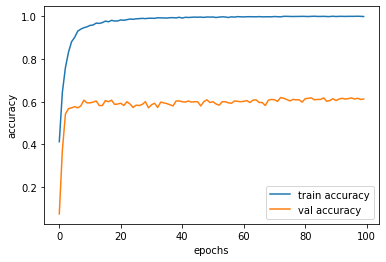

In [19]:
epochs = range(0,100)
acc = cnnhistory.history['accuracy']
val_acc = cnnhistory.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [20]:
# getting my dataset loaded:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration = 30, offset = 60)
  mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
  print(filename, 'done')
  return mfcc

# loading the dataset
paths = []
labels = []
files = []
datadir = "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2"

for dirname, president, filenames in os.walk(datadir):
  for filename in filenames:
    if filename != '.DS_Store':
      paths.append(os.path.join(dirname, filename))
      label = dirname.split('/')[-1]
      labels.append(label)
      files.append(filename)

# creating dataframe
data = pd.DataFrame()
data['speech'] = paths
data['labels'] = labels
data['filename'] = files
data.head()

,speech,labels,filename
0,/content/drive/MyDrive/Deep Learning/Political...,John F. Kennedy,588.mp3
1,/content/drive/MyDrive/Deep Learning/Political...,John F. Kennedy,589.mp3
2,/content/drive/MyDrive/Deep Learning/Political...,John F. Kennedy,594.mp3
3,/content/drive/MyDrive/Deep Learning/Political...,John F. Kennedy,595.mp3
4,/content/drive/MyDrive/Deep Learning/Political...,John F. Kennedy,605.mp3


In [21]:
data_mfcc = data['speech'].apply(lambda x: extract_mfcc(x))

/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/588.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/589.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/594.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/595.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/605.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/602.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/612.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/619.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/622.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches

In [22]:
data_mfcc

0      [-220.07184, 166.65898, -100.1954, -15.531105,...
1      [-258.07776, 133.59967, -45.98028, 12.876276, ...
2      [-237.23466, 149.80635, -46.70787, 33.15772, -...
3      [-287.65503, 171.66159, -16.42228, -30.533337,...
4      [-202.7244, 105.4874, -53.439472, 35.99678, -2...
                             ...                        
135    [-479.50504, 154.1326, 25.118778, 35.435963, 2...
136    [-316.59067, 115.7062, -24.844387, 47.64137, 3...
137    [-425.3395, 162.17715, 14.130533, 34.30965, 20...
138    [-223.10649, 158.44333, -67.4183, 43.90846, -9...
139    [-407.0804, 145.00581, -10.140112, 26.31172, 8...
Name: speech, Length: 140, dtype: object

In [23]:
my_embeds = []

In [24]:
for embed in data_mfcc:
  will_add = embed.reshape(-1,40,1)
  my_embeds.append(will_add)

In [25]:
my_embeds = np.array(my_embeds)

In [26]:
predictions = []
for i in range(len(data_mfcc)):
  pred = model_2.predict([data_mfcc[i].reshape(-1,40,1)])
  predictions.append(pred)

In [27]:
len(predictions)

140

In [28]:
labels.count('John F. Kennedy')
# The first 18 are JFK

18

In [29]:
emotions = pd.DataFrame()
emotions['president'] = labels
emotions['results'] = predictions
emotions['filename'] = files


In [30]:
feelings = ['angry', 'happy', 'disgust', 'sad', 'fear', 'neutral', 'pleasant surprise']
for i in range(len(feelings)):
  emotions[feelings[i]] = [x[0][i] for x in predictions]

In [31]:
emotions.head()

,president,results,filename,angry,happy,disgust,sad,fear,neutral,pleasant surprise
0,John F. Kennedy,"[[1.3075713e-06, 0.9999603, 3.4253775e-10, 8.6...",588.mp3,1.307571e-06,0.999960,3.425377e-10,8.633659e-08,4.014030e-15,3.829174e-05,8.462449e-13
1,John F. Kennedy,"[[2.279607e-08, 0.9999963, 2.0292334e-09, 5.30...",589.mp3,2.279607e-08,0.999996,2.029233e-09,5.309172e-07,1.297505e-11,1.111264e-07,3.109729e-06
2,John F. Kennedy,"[[9.8094645e-08, 0.99876463, 1.1269632e-06, 2....",594.mp3,9.809465e-08,0.998765,1.126963e-06,2.492367e-05,1.083821e-09,1.296199e-04,1.079630e-03
3,John F. Kennedy,"[[2.413902e-09, 0.9999987, 1.2025385e-09, 1.10...",595.mp3,2.413902e-09,0.999999,1.202539e-09,1.100213e-06,3.993980e-13,8.509573e-08,1.564595e-07
4,John F. Kennedy,"[[0.0005397827, 0.99936455, 4.441933e-05, 8.72...",605.mp3,5.397827e-04,0.999365,4.441933e-05,8.726929e-06,3.571127e-09,1.144237e-05,3.110352e-05


In [32]:
emotions.to_csv('audio_emotions_results')

In [33]:
import seaborn as sns

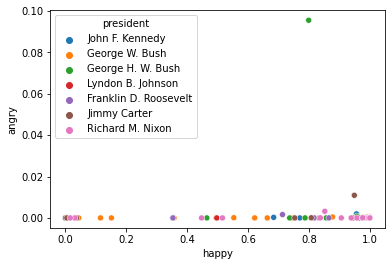

In [34]:
def plot_emotions(x_em, y_em): 
  sns.scatterplot(x_em, y_em, data=emotions, hue='president')
  plt.show()

plot_emotions('happy', 'angry')


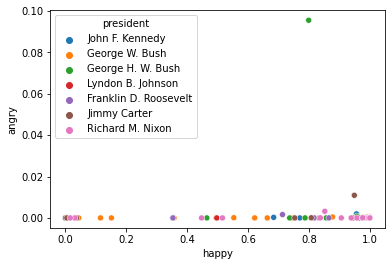

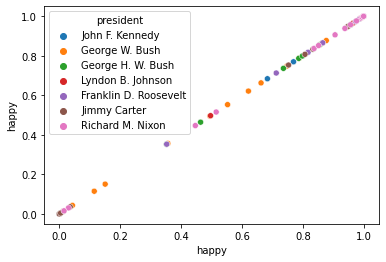

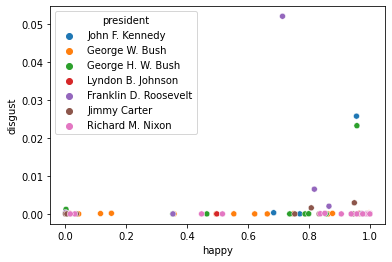

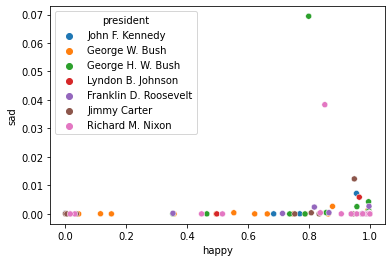

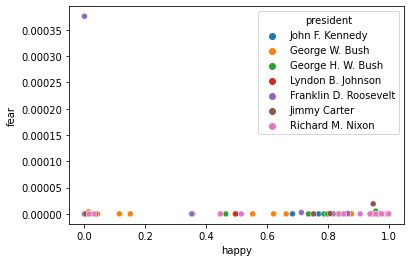

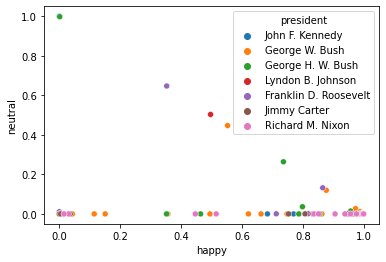

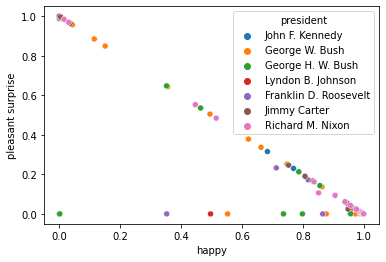

In [35]:
for feel in feelings:
  plot_emotions('happy', feel)

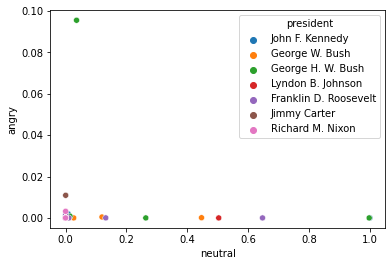

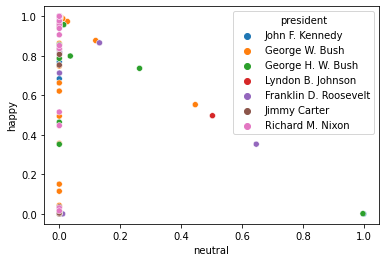

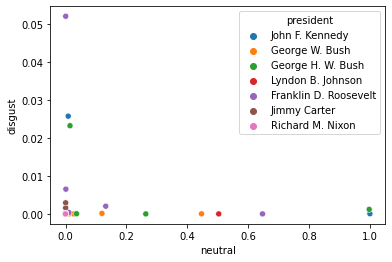

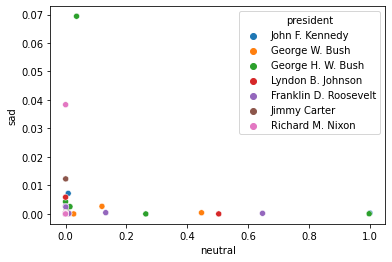

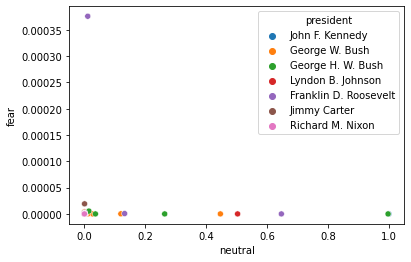

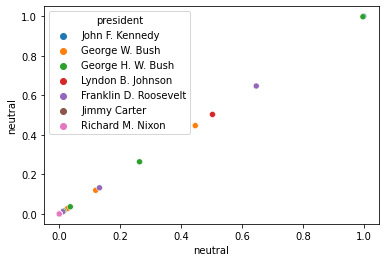

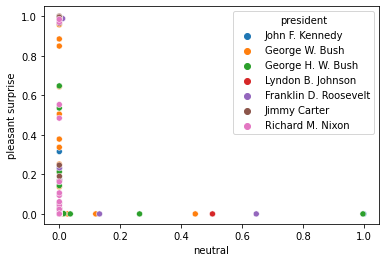

In [36]:
for feel in feelings:
  plot_emotions('neutral', feel)

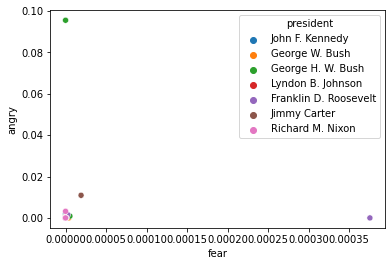

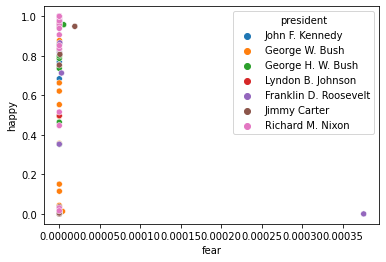

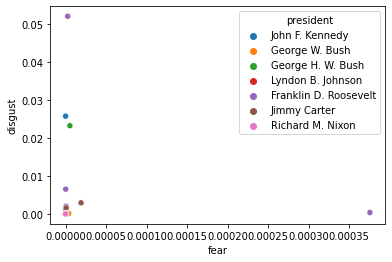

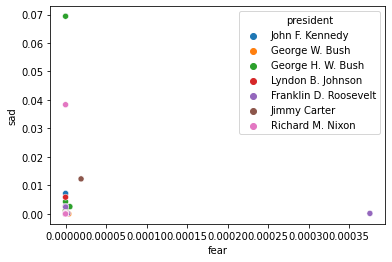

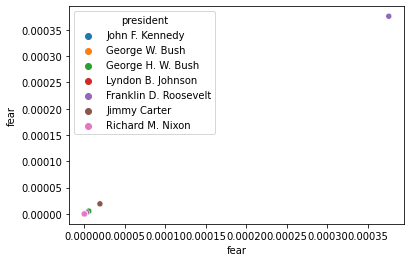

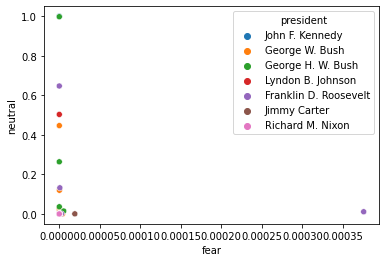

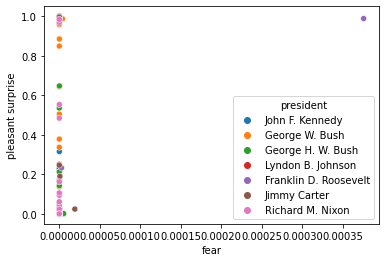

In [37]:
for feel in feelings:
  plot_emotions('fear', feel)

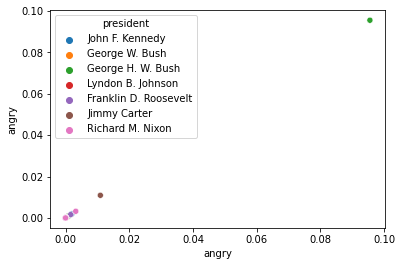

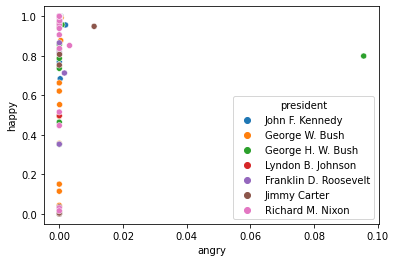

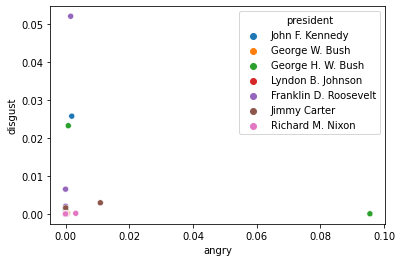

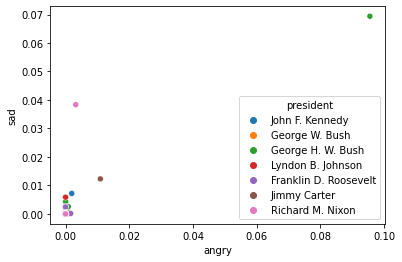

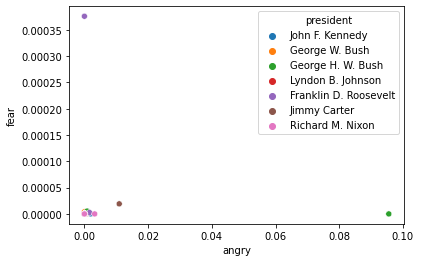

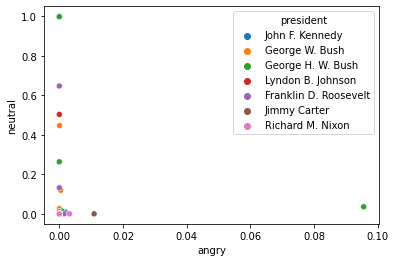

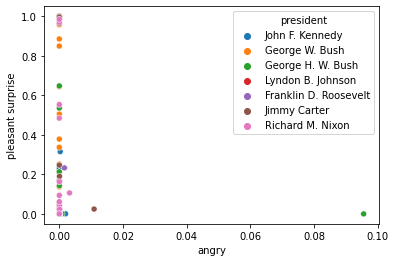

In [71]:
for feel in feelings:
  plot_emotions('angry', feel)

# Getting Contexts Heatmap

In [38]:
presis_data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/presidential_speeches_manual_labels.csv')

In [39]:
# subsetting to the presidents I have audio data one
presis_data = presis_data.loc[presis_data['President'].isin(labels)]

In [40]:
presis_data['President'].value_counts()

Lyndon B. Johnson        71
Franklin D. Roosevelt    49
John F. Kennedy          44
George W. Bush           39
Richard M. Nixon         23
George H. W. Bush        23
Jimmy Carter             22
Name: President, dtype: int64

In [41]:
presis_data['Context'].value_counts()

War              45
SOTU             29
Press            26
FP               26
Policy           21
Money            20
University       18
Inaugural        12
Debate           10
Convention        9
UN                6
Protest           5
Commemoration     5
Congress          4
Scandal           4
Tragedy           4
Campaign          3
Farewell          3
Name: Context, dtype: int64

# Lets start with War Contexts

grab two speeches per president, coded as 'war'

In [42]:
presis_data.loc[presis_data['Context'].isin(['War'])]['President'].value_counts()

Franklin D. Roosevelt    21
George W. Bush            8
Lyndon B. Johnson         7
Richard M. Nixon          7
George H. W. Bush         2
Name: President, dtype: int64

In [43]:
presis_data.loc[presis_data['Context'].isin(['War'])]

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL
533,1939-09-03,Franklin D. Roosevelt,Democratic,War,On the European War,Hours after Great Britain and France declare w...,My fellow Americans and my friends: Tonight my...,https://millercenter.org/the-presidency/presid...
534,1940-05-26,Franklin D. Roosevelt,Democratic,War,On National Defense,"Responding to Hitler's invasion of Denmark, No...",My friends: At this moment of sadness througho...,https://millercenter.org/the-presidency/presid...
535,1940-06-10,Franklin D. Roosevelt,Democratic,War,"""Stab in the Back"" Speech",The President condemns the actions of Mussolin...,"President Newcomb, my friends of the Universit...",https://millercenter.org/the-presidency/presid...
537,1940-12-29,Franklin D. Roosevelt,Democratic,War,"On the ""Arsenal of Democracy""",After concluding a Destroyers for-Bases treaty...,My friends: This is not a fireside chat on war...,https://millercenter.org/the-presidency/presid...
540,1941-03-15,Franklin D. Roosevelt,Democratic,War,On Lend Lease,The President stresses the urgency of respondi...,This dinner of the White House Correspondents ...,https://millercenter.org/the-presidency/presid...
541,1941-05-27,Franklin D. Roosevelt,Democratic,War,On An Unlimited National Emergency,Franklin Roosevelt predicts Nazi intentions to...,I am speaking tonight from the White House in ...,https://millercenter.org/the-presidency/presid...
542,1941-09-11,Franklin D. Roosevelt,Democratic,War,On The Greer Incident,Roosevelt takes advantage of the Greer inciden...,My fellow Americans: The Navy Department of th...,https://millercenter.org/the-presidency/presid...
543,1941-12-08,Franklin D. Roosevelt,Democratic,War,Address to Congress Requesting a Declaration o...,President Franklin Delano Roosevelt requests f...,"Mr. Vice President, and Mr. Speaker, and Membe...",https://millercenter.org/the-presidency/presid...
544,1941-12-09,Franklin D. Roosevelt,Democratic,War,On the War with Japan,In this address just two days after the attack...,My Fellow Americans: The sudden criminal attac...,https://millercenter.org/the-presidency/presid...
545,1941-12-11,Franklin D. Roosevelt,Democratic,War,Message to Congress Requesting War Declaration...,President Roosevelt requests for Congress to d...,To the Congress: On the morning of December el...,https://millercenter.org/the-presidency/presid...


In [44]:
war_presis = ['Franklin D. Roosevelt',"George W. Bush","Lyndon B. Johnson","Richard M. Nixon","George H. W. Bush "]

In [45]:
first_war_speech_paths = ['/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Franklin D. Roosevelt/spe_1939_0903_roosevelt.mp3',
                          "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/894.mp3",
                          "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/894.mp3",
                          "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Richard M. Nixon/spe_1969_1103_nixon.mp3",
                          "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George H. W. Bush/spe_1991_0116_bush.mp3"
                          ]
last_war_speech_paths = [ "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Franklin D. Roosevelt/spe_1943_1224_roosevelt.mp3",
                          "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/gwb_2005_1218_IraqRenewal.mp3",
                          "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Lyndon B. Johnson/spe_1968_0403_johnson.mp3",
                          "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Richard M. Nixon/spe_1973_0123_nixon.mp3",
                          "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George H. W. Bush/spe_1991_0227_bush.mp3"
                          ]

In [83]:
# getting embeddings:
war = pd.DataFrame()
war['Presidents'] = war_presis
war['paths_one'] = first_war_speech_paths
war['paths_two'] = last_war_speech_paths
war['speech_one_embed'] = war['paths_one'].apply(lambda x: extract_mfcc(x))
war['speech_two_embed'] = war['paths_two'].apply(lambda x: extract_mfcc(x))

/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Franklin D. Roosevelt/spe_1939_0903_roosevelt.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/894.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/894.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Richard M. Nixon/spe_1969_1103_nixon.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George H. W. Bush/spe_1991_0116_bush.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Franklin D. Roosevelt/spe_1943_1224_roosevelt.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/gwb_2005_1218_IraqRenewal.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Lyndon B. Johnson/spe_1968_0403_johnson.mp3 done
/content/drive/MyDrive/Deep Learnin

In [47]:
from sklearn.metrics.pairwise import cosine_distances

In [84]:
war['speech_one_embed'].iloc[1]

array([-4.0601553e+02,  8.5235428e+01,  6.9337268e+00,  1.6694801e+01,
        3.9227861e-01,  4.5103559e+00, -6.5199780e+00, -8.7278042e+00,
       -6.2177234e+00,  1.5932468e+00, -1.1690559e+01,  2.6071908e+00,
       -9.4344835e+00, -2.4973447e+00, -6.7763009e+00, -5.0215850e+00,
       -4.8248591e+00, -2.4433954e+00, -5.4989285e+00, -6.3055044e-01,
       -9.8789530e+00,  4.1246572e-01, -1.2135753e+01,  4.1720972e+00,
       -4.0801015e+00,  4.7915608e-01, -2.4754333e-01,  9.3814723e-02,
       -4.1971713e-01, -1.8403152e+00, -7.9263288e-01, -9.8829484e-01,
       -3.5187044e+00, -2.1554737e+00, -3.2680891e+00, -2.4995558e+00,
       -2.9971445e+00,  1.0932574e+00, -3.5652308e+00,  1.4626481e-01],
      dtype=float32)

First War Speech

Text(0.5, 1.0, 'Similarities during First War Speeches')

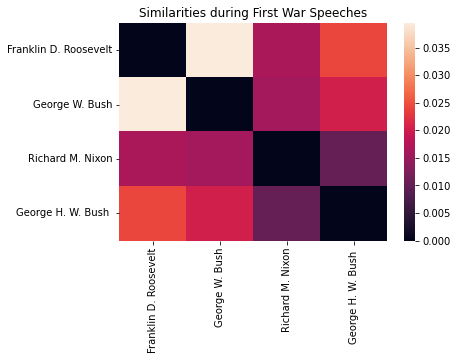

In [87]:
ax = plt.axes()
sns.heatmap(cosine_distances([war['speech_one_embed'].iloc[i] for i in [0,1,3,4]] ), 
            xticklabels=war_presis[:2] + war_presis[3:],
            yticklabels=war_presis[:2] + war_presis[3:])
ax.set_title('Similarities during First War Speeches')

In [50]:
war_presis[:2] + war_presis[3:]

['Franklin D. Roosevelt',
 'George W. Bush',
 'Richard M. Nixon',
 'George H. W. Bush ']

Last War Speech

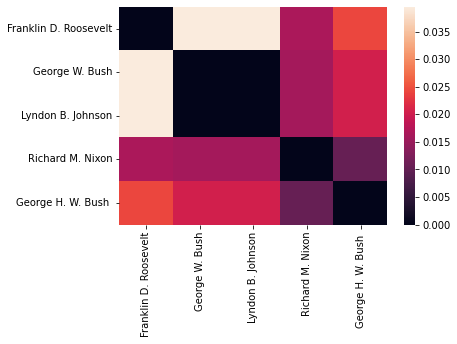

In [51]:
sns.heatmap(cosine_distances([war['speech_one_embed'].iloc[i] for i in range(5)] ), 
            xticklabels=war_presis,
            yticklabels=war_presis)

In [52]:
#War can be a possible context to look at -- first and last war speeches made by each

# Inaugural Speeches

In [53]:
# look at inauguration speeches! good data on that
presis_data.loc[presis_data['Context'].isin(['Inaugural'])]['President'].value_counts()

Franklin D. Roosevelt    4
Richard M. Nixon         2
George W. Bush           2
John F. Kennedy          1
Lyndon B. Johnson        1
Jimmy Carter             1
George H. W. Bush        1
Name: President, dtype: int64

In [54]:
inaugural_presis = ['Franklin D. Roosevelt',
                    'Richard M. Nixon',
                    'George W. Bush',
                    'John F. Kennedy',
                    'Jimmy Carter']

In [55]:
presis_data.loc[presis_data['Context'].isin(['Inaugural'])]

,Date,President,Party,Context,Speech Title,Summary,Transcript,URL
514,1933-03-04,Franklin D. Roosevelt,Democratic,Inaugural,First Inaugural Address,President Franklin Delano Roosevelt delivers t...,"President Hoover, Mr. Chief Justice, my friend...",https://millercenter.org/the-presidency/presid...
525,1937-01-20,Franklin D. Roosevelt,Democratic,Inaugural,Second Inaugural Address,Franklin Delano Roosevelt spells out his first...,When four years ago we met to inaugurate Presi...,https://millercenter.org/the-presidency/presid...
539,1941-01-20,Franklin D. Roosevelt,Democratic,Inaugural,Third Inaugural Address,"In his third of four Inaugural Addresses, Pres...",On each national day of Inauguration since 178...,https://millercenter.org/the-presidency/presid...
560,1945-01-20,Franklin D. Roosevelt,Democratic,Inaugural,Fourth Inaugural Address,Franklin Delano Roosevelt makes a brief addres...,"Mr. Chief Justice, Mr. Vice President, my frie...",https://millercenter.org/the-presidency/presid...
596,1961-01-20,John F. Kennedy,Democratic,Inaugural,Inaugural Address,"In his Inaugural Address, Kennedy pledges to s...","Vice President Johnson, Mr. Speaker, Mr. Chief...",https://millercenter.org/the-presidency/presid...
655,1965-01-20,Lyndon B. Johnson,Democratic,Inaugural,Inaugural Address,President Johnson talks about change in the Un...,My fellow countrymen: On this occasion the oat...,https://millercenter.org/the-presidency/presid...
705,1969-01-20,Richard M. Nixon,Republican,Inaugural,First Inaugural Address,President Richard Nixon addresses the nation a...,"Senator Dirksen, Mr. Chief Justice, Mr. Vice P...",https://millercenter.org/the-presidency/presid...
718,1973-01-20,Richard M. Nixon,Republican,Inaugural,Second Inaugural Address,President Nixon speaks on the theme of respons...,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",https://millercenter.org/the-presidency/presid...
745,1977-01-20,Jimmy Carter,Democratic,Inaugural,Inaugural Address,President Carter notes that the nation must be...,"For myself and for our Nation, I want to thank...",https://millercenter.org/the-presidency/presid...
824,1989-01-20,George H. W. Bush,Republican,Inaugural,Inaugural Address,President George H. W. Bush stresses the impor...,"Mr. Chief Justice, Mr. President, Vice Preside...",https://millercenter.org/the-presidency/presid...


In [56]:
inaugural_speeches = ["/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Franklin D. Roosevelt/spe_1933_0304_roosevelt.mp3",
                      "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Richard M. Nixon/spe_1969_0120_nixon.mp3",
                      "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/gwb_2001_0120_FirstInaugural.mp3",
                      "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/595.mp3",
                      "/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Jimmy Carter/spe_1977_0120_carter.mp3",
                      ]

In [57]:
def make_dataset(presi_list, speeches_path):
  df = pd.DataFrame()
  df['Presidents'] = presi_list
  df['paths'] = speeches_path
  df['embeds'] = df['paths'].apply(lambda x: extract_mfcc(x))
  return df

def make_heatmap(presi_list, speeches_path, plot_title):
  df = make_dataset(presi_list = presi_list, speeches_path = speeches_path)
  ax = plt.axes()
  sns.heatmap(cosine_distances([df['embeds'].iloc[i] for i in range(len(presi_list))] ), 
            xticklabels=presi_list,
            yticklabels=presi_list)
  ax.set_title('Similarities during {} Speeches'.format(plot_title))
  

In [58]:
inaugural = make_dataset(inaugural_presis, inaugural_speeches)

/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Franklin D. Roosevelt/spe_1933_0304_roosevelt.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Richard M. Nixon/spe_1969_0120_nixon.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/gwb_2001_0120_FirstInaugural.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/595.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Jimmy Carter/spe_1977_0120_carter.mp3 done


In [59]:
inaugural.head()

,Presidents,paths,embeds
0,Franklin D. Roosevelt,/content/drive/MyDrive/Deep Learning/Political...,"[-258.3317, 115.54729, -60.37511, 6.71233, -3...."
1,Richard M. Nixon,/content/drive/MyDrive/Deep Learning/Political...,"[-223.10649, 158.44333, -67.4183, 43.90846, -9..."
2,George W. Bush,/content/drive/MyDrive/Deep Learning/Political...,"[-319.2582, 110.06122, -7.198747, 8.956381, 0...."
3,John F. Kennedy,/content/drive/MyDrive/Deep Learning/Political...,"[-287.65503, 171.66159, -16.42228, -30.533337,..."
4,Jimmy Carter,/content/drive/MyDrive/Deep Learning/Political...,"[-196.08981, 143.28249, -30.01689, 21.156622, ..."


/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Franklin D. Roosevelt/spe_1933_0304_roosevelt.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Richard M. Nixon/spe_1969_0120_nixon.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/George W. Bush/gwb_2001_0120_FirstInaugural.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/John F. Kennedy/595.mp3 done
/content/drive/MyDrive/Deep Learning/Political_Speeches_Folder/audio_data_2/Jimmy Carter/spe_1977_0120_carter.mp3 done


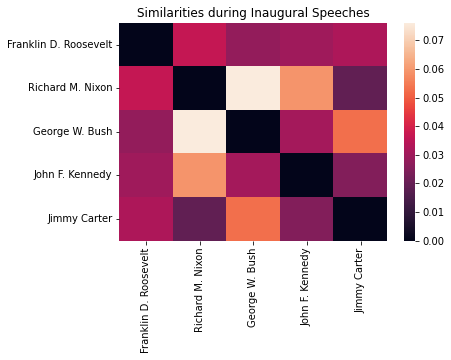

In [60]:
make_heatmap(inaugural_presis, inaugural_speeches, 'Inaugural')


#Emotions Heatmaps Based on Context

In [63]:
emotions.head()

,president,results,filename,angry,happy,disgust,sad,fear,neutral,pleasant surprise
0,John F. Kennedy,"[[1.3075713e-06, 0.9999603, 3.4253775e-10, 8.6...",588.mp3,1.307571e-06,0.999960,3.425377e-10,8.633659e-08,4.014030e-15,3.829174e-05,8.462449e-13
1,John F. Kennedy,"[[2.279607e-08, 0.9999963, 2.0292334e-09, 5.30...",589.mp3,2.279607e-08,0.999996,2.029233e-09,5.309172e-07,1.297505e-11,1.111264e-07,3.109729e-06
2,John F. Kennedy,"[[9.8094645e-08, 0.99876463, 1.1269632e-06, 2....",594.mp3,9.809465e-08,0.998765,1.126963e-06,2.492367e-05,1.083821e-09,1.296199e-04,1.079630e-03
3,John F. Kennedy,"[[2.413902e-09, 0.9999987, 1.2025385e-09, 1.10...",595.mp3,2.413902e-09,0.999999,1.202539e-09,1.100213e-06,3.993980e-13,8.509573e-08,1.564595e-07
4,John F. Kennedy,"[[0.0005397827, 0.99936455, 4.441933e-05, 8.72...",605.mp3,5.397827e-04,0.999365,4.441933e-05,8.726929e-06,3.571127e-09,1.144237e-05,3.110352e-05


In [64]:
inaugural_speeches_file = ["spe_1933_0304_roosevelt.mp3",
                      "spe_1969_0120_nixon.mp3",
                      "gwb_2001_0120_FirstInaugural.mp3",
                      "595.mp3",
                      "spe_1977_0120_carter.mp3",
                      ]

In [65]:
inaugural_presis = ['Franklin D. Roosevelt',
                    'Richard M. Nixon',
                    'George W. Bush',
                    'John F. Kennedy',
                    'Jimmy Carter']

In [66]:
emotions.loc[emotions['filename'].isin(inaugural_speeches_file)]

,president,results,filename,angry,happy,disgust,sad,fear,neutral,pleasant surprise
3,John F. Kennedy,"[[2.413902e-09, 0.9999987, 1.2025385e-09, 1.10...",595.mp3,2.413902e-09,0.999999,1.202539e-09,1.100213e-06,3.993980e-13,8.509573e-08,1.564595e-07
18,George W. Bush,"[[7.960117e-07, 0.9999758, 1.3420424e-06, 5.94...",gwb_2001_0120_FirstInaugural.mp3,7.960117e-07,0.999976,1.342042e-06,5.949919e-07,3.461409e-10,3.100348e-07,2.114012e-05
76,Franklin D. Roosevelt,"[[1.2103385e-06, 0.9999776, 6.284707e-09, 1.46...",spe_1933_0304_roosevelt.mp3,1.210338e-06,0.999978,6.284707e-09,1.468079e-05,1.368570e-12,6.600588e-06,3.867157e-09
112,Jimmy Carter,"[[3.606689e-06, 0.9951748, 9.322358e-07, 4.680...",spe_1977_0120_carter.mp3,3.606689e-06,0.995175,9.322358e-07,4.680996e-05,4.886611e-10,5.457363e-07,4.773246e-03
138,Richard M. Nixon,"[[1.3763021e-05, 0.9999753, 1.6640469e-06, 3.2...",spe_1969_0120_nixon.mp3,1.376302e-05,0.999975,1.664047e-06,3.267988e-06,2.478765e-12,1.409100e-07,6.005873e-06


In [67]:
inaugutal = pd.DataFrame()
inaugural['president'] = inaugural_presis

In [68]:
inaugural = pd.merge(inaugural, emotions.loc[emotions['filename'].isin(inaugural_speeches_file)], on='president')

In [69]:
inaugural

,Presidents,paths,embeds,president,results,filename,angry,happy,disgust,sad,fear,neutral,pleasant surprise
0,Franklin D. Roosevelt,/content/drive/MyDrive/Deep Learning/Political...,"[-258.3317, 115.54729, -60.37511, 6.71233, -3....",Franklin D. Roosevelt,"[[1.2103385e-06, 0.9999776, 6.284707e-09, 1.46...",spe_1933_0304_roosevelt.mp3,1.210338e-06,0.999978,6.284707e-09,1.468079e-05,1.368570e-12,6.600588e-06,3.867157e-09
1,Richard M. Nixon,/content/drive/MyDrive/Deep Learning/Political...,"[-223.10649, 158.44333, -67.4183, 43.90846, -9...",Richard M. Nixon,"[[1.3763021e-05, 0.9999753, 1.6640469e-06, 3.2...",spe_1969_0120_nixon.mp3,1.376302e-05,0.999975,1.664047e-06,3.267988e-06,2.478765e-12,1.409100e-07,6.005873e-06
2,George W. Bush,/content/drive/MyDrive/Deep Learning/Political...,"[-319.2582, 110.06122, -7.198747, 8.956381, 0....",George W. Bush,"[[7.960117e-07, 0.9999758, 1.3420424e-06, 5.94...",gwb_2001_0120_FirstInaugural.mp3,7.960117e-07,0.999976,1.342042e-06,5.949919e-07,3.461409e-10,3.100348e-07,2.114012e-05
3,John F. Kennedy,/content/drive/MyDrive/Deep Learning/Political...,"[-287.65503, 171.66159, -16.42228, -30.533337,...",John F. Kennedy,"[[2.413902e-09, 0.9999987, 1.2025385e-09, 1.10...",595.mp3,2.413902e-09,0.999999,1.202539e-09,1.100213e-06,3.993980e-13,8.509573e-08,1.564595e-07
4,Jimmy Carter,/content/drive/MyDrive/Deep Learning/Political...,"[-196.08981, 143.28249, -30.01689, 21.156622, ...",Jimmy Carter,"[[3.606689e-06, 0.9951748, 9.322358e-07, 4.680...",spe_1977_0120_carter.mp3,3.606689e-06,0.995175,9.322358e-07,4.680996e-05,4.886611e-10,5.457363e-07,4.773246e-03


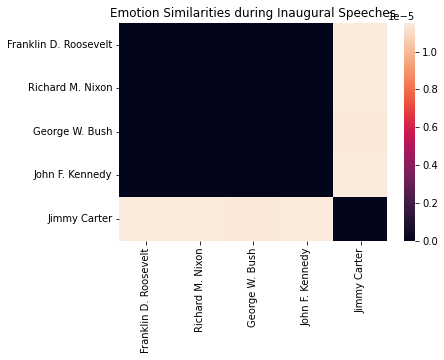

In [70]:
ax = plt.axes()
sns.heatmap(cosine_distances([inaugural['results'].iloc[i][0] for i in range(5)] ), 
            xticklabels=inaugural['president'],
            yticklabels=inaugural['president'])
ax.set_title('Emotion Similarities during Inaugural Speeches')
plt.show()

# War emotion Heatmap

In [93]:
first_war_speech_files = ['spe_1939_0903_roosevelt.mp3',
                          "894.mp3",
                          "spe_1969_1103_nixon.mp3",
                          "spe_1991_0116_bush.mp3"
                          ]
war_presis = ['Franklin D. Roosevelt',"George W. Bush","Lyndon B. Johnson","Richard M. Nixon","George H. W. Bush"]

war = pd.DataFrame()
war['president'] = war_presis
war = pd.merge(war, emotions.loc[emotions['filename'].isin(first_war_speech_files)], on='president')

In [94]:
war

,president,results,filename,angry,happy,disgust,sad,fear,neutral,pleasant surprise
0,Franklin D. Roosevelt,"[[2.8352395e-06, 0.9989686, 2.055228e-05, 0.00...",spe_1939_0903_roosevelt.mp3,2.835239e-06,0.998969,2.055228e-05,2.060585e-04,2.658255e-09,3.030461e-04,0.000499
1,George W. Bush,"[[8.2994734e-07, 0.9998178, 1.8680939e-06, 2.0...",894.mp3,8.299473e-07,0.999818,1.868094e-06,2.075196e-06,1.088788e-10,2.464492e-08,0.000177
2,Richard M. Nixon,"[[8.4420515e-10, 0.93840504, 7.0593487e-09, 3....",spe_1969_1103_nixon.mp3,8.442052e-10,0.938405,7.059349e-09,3.404835e-07,1.129359e-12,7.546492e-10,0.061595
3,George H. W. Bush,"[[2.6095691e-05, 0.99874973, 4.777449e-06, 8.2...",spe_1991_0116_bush.mp3,2.609569e-05,0.998750,4.777449e-06,8.269618e-05,6.096518e-09,7.493573e-06,0.001129


,president,results,filename,angry,happy,disgust,sad,fear,neutral,pleasant surprise
26,George W. Bush,"[[8.2994734e-07, 0.9998178, 1.8680939e-06, 2.0...",894.mp3,8.299473e-07,0.999818,1.868094e-06,2.075196e-06,1.088788e-10,2.464492e-08,0.000177
53,George H. W. Bush,"[[2.6095691e-05, 0.99874973, 4.777449e-06, 8.2...",spe_1991_0116_bush.mp3,2.609569e-05,0.998750,4.777449e-06,8.269618e-05,6.096518e-09,7.493573e-06,0.001129
84,Franklin D. Roosevelt,"[[2.8352395e-06, 0.9989686, 2.055228e-05, 0.00...",spe_1939_0903_roosevelt.mp3,2.835239e-06,0.998969,2.055228e-05,2.060585e-04,2.658255e-09,3.030461e-04,0.000499
137,Richard M. Nixon,"[[8.4420515e-10, 0.93840504, 7.0593487e-09, 3....",spe_1969_1103_nixon.mp3,8.442052e-10,0.938405,7.059349e-09,3.404835e-07,1.129359e-12,7.546492e-10,0.061595


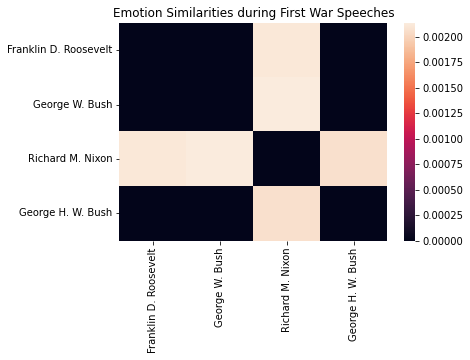

In [95]:
ax = plt.axes()
sns.heatmap(cosine_distances([war['results'].iloc[i][0] for i in range(4)] ), 
            xticklabels=war['president'],
            yticklabels=war['president'])
ax.set_title('Emotion Similarities during First War Speeches')
plt.show()

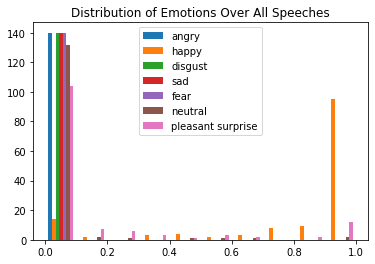

In [109]:
# histogram of emotions
plt.hist([emotions[feel] for feel in feelings], label= feelings)
plt.legend()
plt.title('Distribution of Emotions Over All Speeches')
plt.show()
# Showing the plot using plt.show()
